# COVID-19 dashboard

## Info

Data source:
- https://github.com/dssg-pt/covid19pt-data

Usage:
- Download the latest data from [dssg-pt](https://github.com/dssg-pt/covid19pt-data)
- Run notebook

## Configuration variables

In [ ]:
DATA_FILE_URL = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
DATA_FILE_URL_CONCELHOS = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data_concelhos.csv'
DATA_FILEPATH = 'data.csv'
DATA_FILEPATH_CONCELHOS = 'data_concelhos.csv'

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

## Load data

In [3]:
from requests import get

def download(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)

download(DATA_FILE_URL, DATA_FILEPATH)
download(DATA_FILE_URL_CONCELHOS, DATA_FILEPATH_CONCELHOS)

In [4]:
df = pd.read_csv(DATA_FILEPATH, parse_dates=[0], index_col=[0], infer_datetime_format=True)
df.fillna(value=0, inplace=True)

df_concelhos = pd.read_csv(DATA_FILEPATH_CONCELHOS, parse_dates=[0], index_col=[0], infer_datetime_format=True)
df_concelhos.fillna(value=0, inplace=True)

## Overview

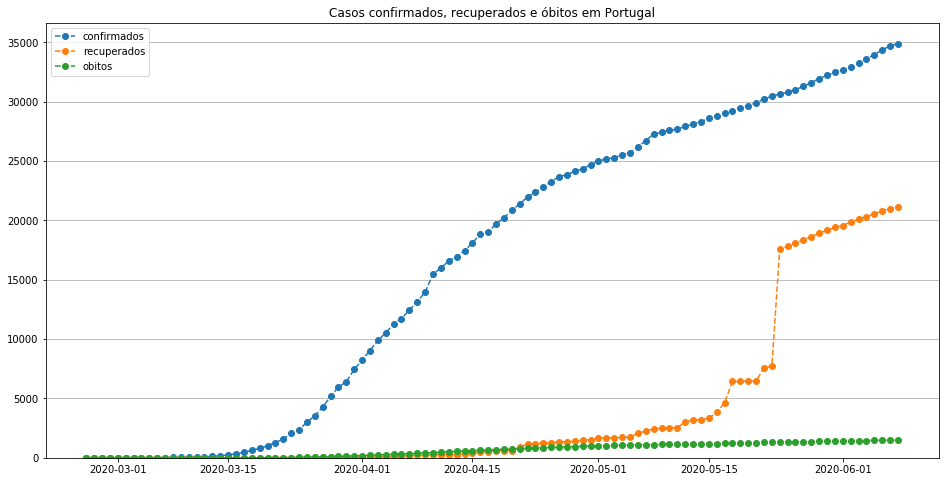

In [5]:
figsize(16, 8)

fig, ax = plt.subplots()
ax.plot(df.index, df[['confirmados', 'recuperados', 'obitos']], linestyle='--', marker='o')
ax.set_ylim(bottom=0)
plt.grid(axis='y')
plt.title('Casos confirmados, recuperados e óbitos em Portugal')
plt.legend(['confirmados', 'recuperados', 'obitos'], loc='upper left');

## Overview concelhos

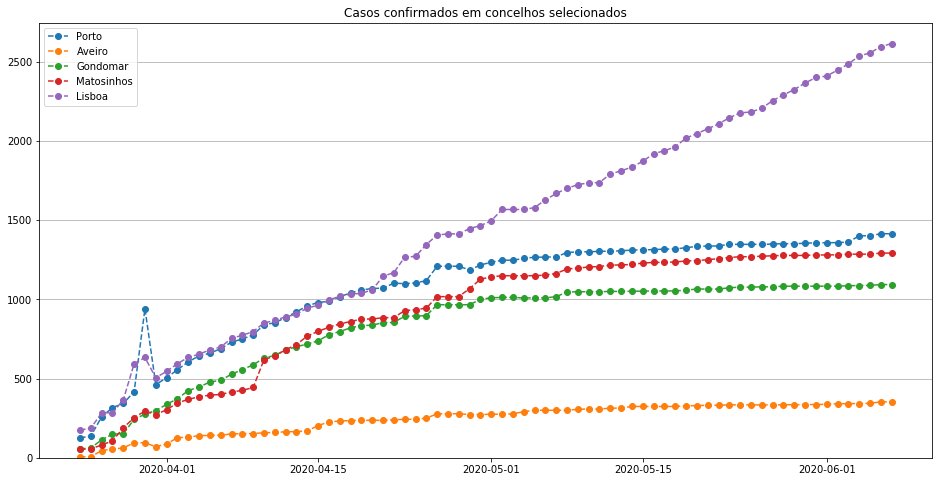

In [6]:
figsize(16, 8)

fig, ax = plt.subplots()
ax.plot(df_concelhos.index, df_concelhos[['PORTO', 'AVEIRO', 'GONDOMAR', 'MATOSINHOS', 'LISBOA']], linestyle='--', marker='o')
ax.set_ylim(bottom=0)
plt.grid(axis='y')
plt.title('Casos confirmados em concelhos selecionados')
plt.legend(['Porto', 'Aveiro', 'Gondomar', 'Matosinhos', 'Lisboa'], loc='upper left');

In [7]:
# Population data
POP_CONCELHOS = {
    'PORTO': 215284, 
    'AVEIRO': 77916, 
    'GONDOMAR': 165631, 
    'MATOSINHOS': 174382, 
    'LISBOA': 507220
}

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


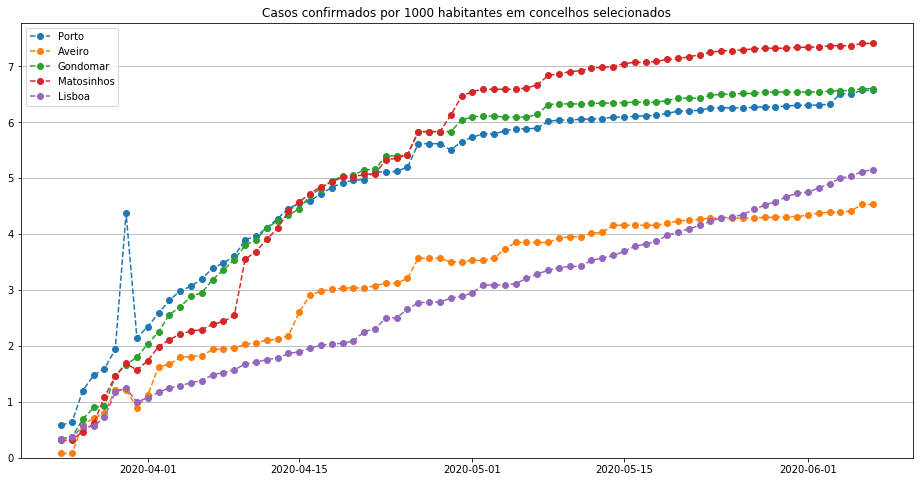

In [8]:
df_c = df_concelhos[['PORTO', 'AVEIRO', 'GONDOMAR', 'MATOSINHOS', 'LISBOA']]

for col in df_c.columns:
     df_c[col+'_p1000'] = df_c[col]/POP_CONCELHOS[col]*1000

figsize(16, 8)

fig, ax = plt.subplots()
ax.plot(df_c.index, df_c[['PORTO_p1000', 'AVEIRO_p1000', 'GONDOMAR_p1000', 'MATOSINHOS_p1000', 'LISBOA_p1000']], linestyle='--', marker='o')
ax.set_ylim(bottom=0)
plt.grid(axis='y')
plt.title('Casos confirmados por 1000 habitantes em concelhos selecionados')
plt.legend(['Porto', 'Aveiro', 'Gondomar', 'Matosinhos', 'Lisboa'], loc='upper left');

## Monitoring

lab: Número de casos suspeitos a aguardar resultados laboratoriais

suspeitos: Total de casos suspeitos (tendo a definição sido actualizada a 29/02/2020) desde 01/01/2020

vigilancia: Número de casos sob vigilância pelas autoridades de saúde 

n_confirmados: Número de casos cuja suspeita de infecção não se confirmou

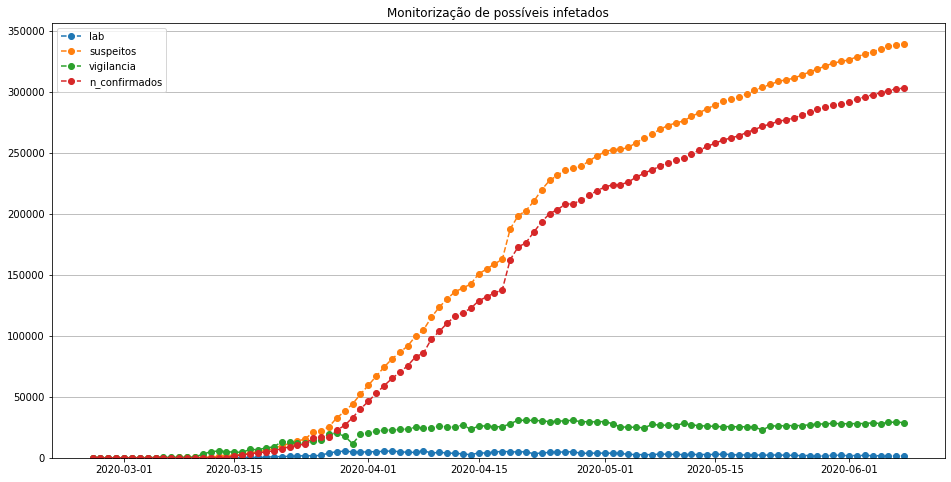

In [9]:
figsize(16, 8)

fig, ax = plt.subplots()
ax.plot(df.index, df[['lab', 'suspeitos', 'vigilancia', 'n_confirmados']], linestyle='--', marker='o')
ax.set_ylim(bottom=0)
plt.grid(axis='y')
plt.title('Monitorização de possíveis infetados')
plt.legend(['lab', 'suspeitos', 'vigilancia', 'n_confirmados'], loc='upper left');

## Transmission chains

cadeias_transmissao: Número de cadeias de transmissão do SARS-CoV-2 activas

transmissao_importada: Número de casos confirmados com transmissão por via de infectados de outros países

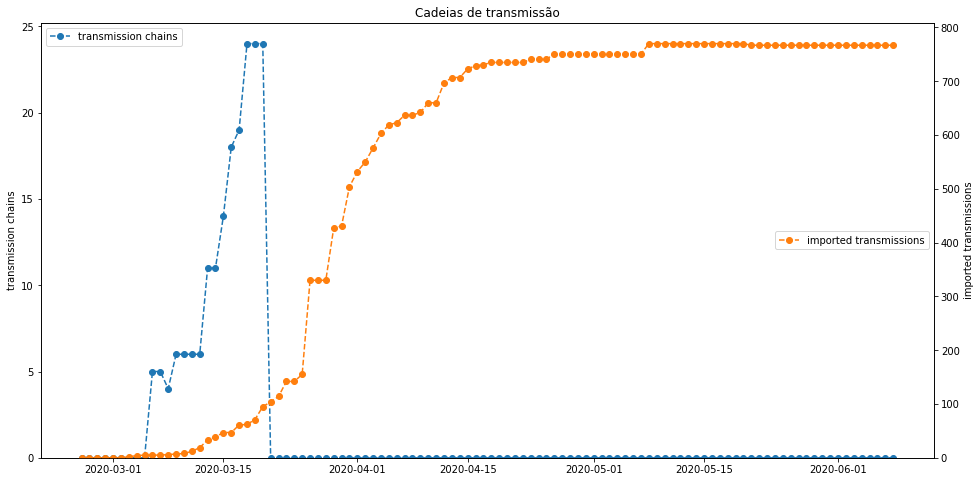

In [10]:
figsize(16, 8)

fig, ax1 = plt.subplots()
ax1.set_ylabel('transmission chains')
ax1.plot(df.index, df['cadeias_transmissao'], linestyle='--', marker='o', label='transmission chains')
ax2 = ax1.twinx()
ax2.set_ylabel('imported transmissions')
ax2.plot(df.index, df['transmissao_importada'], linestyle='--', marker='o', label='imported transmissions', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
ax1.legend(loc='upper left')
ax2.legend(loc='center right');
ax1.set_ylim(bottom=0);
ax2.set_ylim(bottom=0);
plt.title('Cadeias de transmissão');